<a href="https://colab.research.google.com/github/Krazy-68/Autonomous_vehichle_detection/blob/main/Autonomous_vehichle_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


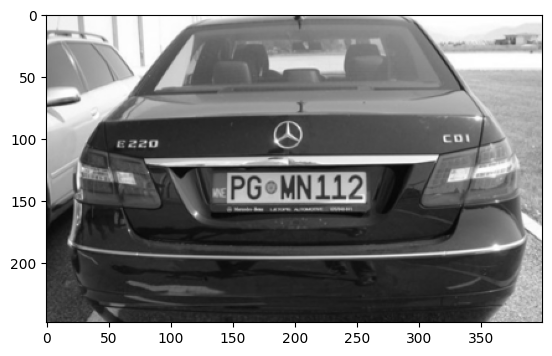

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
img = cv2.imread('/content/drive/MyDrive/Thapar/1/images/Cars1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))


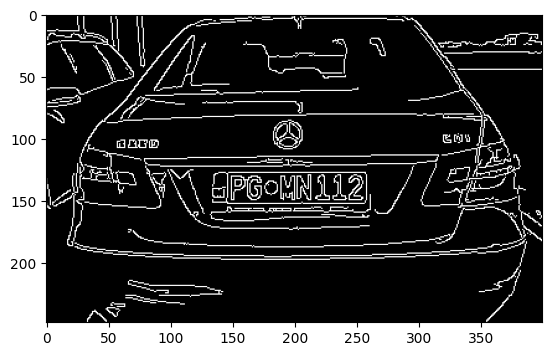

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]


In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True)
    if len(approx) ==4:
      location = approx
      break


In [ ]:
print('Printing the location')
location

Printing the location


array([[[146, 128]],

       [[256, 127]],

       [[258, 149]],

       [[147, 152]]], dtype=int32)

AxesImage(size=(248, 400))


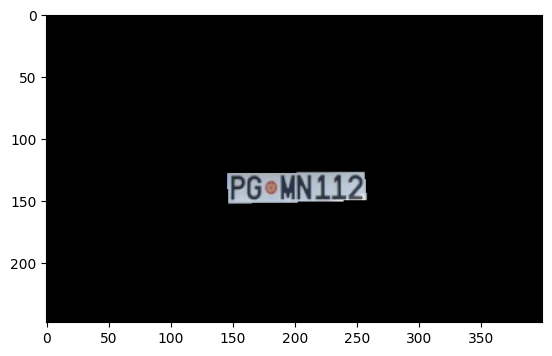

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)
print(plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)))

AxesImage(size=(26, 113))


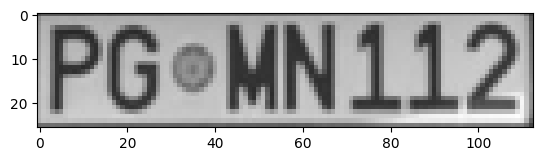

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
print(plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)))



In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print('printing the Image Matrix')
print(result)




Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Completeprinting the Image Matrix
[([[0, 0], [113, 0], [113, 26], [0, 26]], 'PGoMN112', 0.6897343444179759)]


AxesImage(size=(248, 400))
Printing the number plate that has been captured from the picture:->


'PGoMN112'

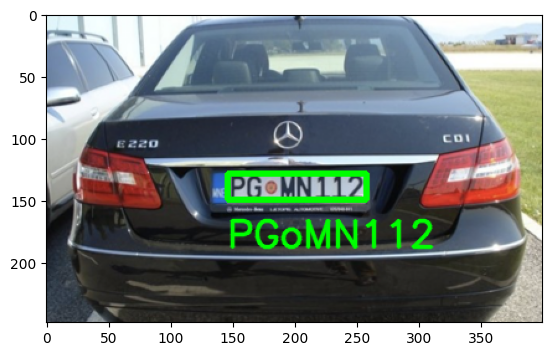

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
print(plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)))
print("Printing the number plate that has been captured from the picture:->")
text

#**Colour**

In [ ]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
index=["color","color_name","hex","R","G","B"]
csv = pd.read_csv('/content/drive/MyDrive/Thapar/1/colors.csv.xls', names=index, header=None)

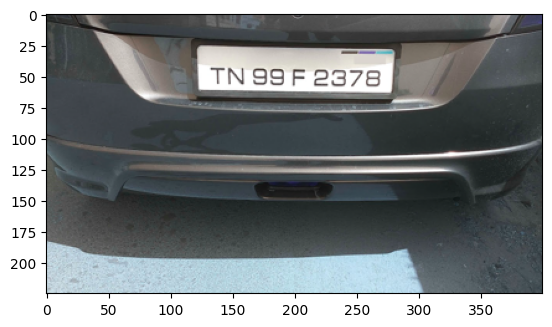

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Thapar/1/images/Cars73.png')
plt.imshow(img)
plt.show()

In [ ]:
global x_loc,y_loc,r,g,B
y_loc=int(input("Enter the y coordinates "))
x_loc=int(input("Enter the x coordinates "))
b,g,r=img[x_loc,y_loc]
b=int(b)
g=int(g)
r=int(r)

Enter the y coordinates 100
Enter the x coordinates 120


In [ ]:
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

In [ ]:
text_1 = getColorName(r,g,b) + ' R='+ str(r) + ' G='+ str(g) + ' B='+ str(b)
text_1

'Liver R=79 G=80 B=74'

In [ ]:
print("The Number plate and the colour of the car is as follows :->")
print(text,"----",text_1)

The Number plate and the colour of the car is as follows :->
PGoMN112 ---- Liver R=79 G=80 B=74
